<a href="https://colab.research.google.com/github/nzagiFrancisco/DataScience_01/blob/main/Ci%C3%AAncia_de_Dados_Projeto_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte da base de Dados:
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv

In [117]:
#Importando as Bibliotecas necessárias pa análise

In [118]:
import pandas as pd

In [119]:
import numpy as np


In [120]:
import matplotlib.pyplot as plt


In [121]:
import seaborn as sns

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
from sklearn.metrics import r2_score

In [124]:
#Carregando o arquivo csv do computador local
baseDeDados = pd.read_csv("/content/Life Expectancy Data.csv", index_col="Country")


In [125]:
#Visualizando a base de dados das 5 primeiras linhas

In [126]:
baseDeDados.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [127]:
#Visualizando todas as colunas da base de dados
baseDeDados.dtypes


Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [128]:
baseDeDados.columns.values

array(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [129]:
#Selecionando as colunas para análise
colunasSelecionadas = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', ' HIV/AIDS', 'GDP', 'Income composition of resources', 'Schooling']

In [130]:
selecionados = baseDeDados.filter(items=colunasSelecionadas)

In [131]:
#Visualizando as colunas selecionadas

In [132]:
selecionados.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Income composition of resources,Schooling
Country,,,,,,,,,
Afghanistan,2015,65.0,263.0,62,0.01,0.1,584.259210,0.479,10.1
Afghanistan,2014,59.9,271.0,64,0.01,0.1,612.696514,0.476,10.0
Afghanistan,2013,59.9,268.0,66,0.01,0.1,631.744976,0.470,9.9
Afghanistan,2012,59.5,272.0,69,0.01,0.1,669.959000,0.463,9.8
Afghanistan,2011,59.2,275.0,71,0.01,0.1,63.537231,0.454,9.5


In [133]:
#Selecionando o país para análise
pais_Angola = selecionados.loc["Angola"]

In [134]:
pais_Angola

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Income composition of resources,Schooling
Country,,,,,,,,,
Angola,2015,52.4,335.0,66,NaN,1.9,3695.793748,0.531,11.4
Angola,2014,51.7,348.0,67,8.33,2.0,479.312240,0.527,11.4
Angola,2013,51.1,355.0,69,8.10,2.3,484.616884,0.523,11.4
Angola,2012,56.0,358.0,72,8.24,2.6,4598.249988,0.508,10.3
Angola,2011,51.0,361.0,75,8.06,2.5,4299.128890,0.495,9.4
Angola,2010,49.6,365.0,78,7.80,2.5,3529.534820,0.488,9.0
Angola,2009,49.1,369.0,81,7.01,2.5,3347.844850,0.480,8.5
Angola,2008,48.7,371.0,84,7.07,2.6,3868.578883,0.468,8.1
Angola,2007,48.2,375.0,87,6.35,2.6,2878.837144,0.454,7.7


In [135]:
#Análise básica do Dataset

In [136]:
pais_Angola.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,HIV/AIDS,GDP,Income composition of resources,Schooling
count,16.000000,16.00000,16.000000,16.000000,15.000000,16.000000,16.000000,16.000000,16.00000
mean,2007.500000,49.01875,328.562500,83.750000,5.740667,2.368750,1975.143045,0.458375,8.04375
std,4.760952,2.83883,111.350479,11.310762,2.329903,0.241437,1675.764567,0.051078,2.28793
min,2000.000000,45.30000,44.000000,66.000000,1.850000,1.900000,141.868440,0.382000,4.60000
25%,2003.750000,47.02500,353.250000,74.250000,3.510000,2.250000,515.780778,0.412750,6.27500
50%,2007.500000,48.45000,367.000000,85.500000,6.350000,2.500000,1111.730143,0.461000,7.90000
75%,2011.250000,51.02500,381.250000,94.250000,7.930000,2.525000,3571.099552,0.498250,9.62500
max,2015.000000,56.00000,391.000000,97.000000,8.330000,2.600000,4598.249988,0.531000,11.40000


COMEÇANDO AGORA COM A NOSSA ANÁLISE SELECIONANDO A COLUNA(S).

In [137]:
#Visualizando 'Year' e 'infant deaths' de 2000 a 2015
pais_Angola[['Year','infant deaths']]

,Year,infant deaths
Country,,
Angola,2015,66
Angola,2014,67
Angola,2013,69
Angola,2012,72
Angola,2011,75
Angola,2010,78
Angola,2009,81
Angola,2008,84
Angola,2007,87


In [139]:
#Criando um DataFrame mortalidade_Infantil (infant deaths) para análise. 
#Neste caso temos duas variáveis que são Year e infant deaths 
mortalidade_Infantil=pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],'infant deaths':[97,97,96,95,94,92,90,87,84,81,78,75,72,69,67,66]})

In [140]:
mortalidade_Infantil

,Year,infant deaths
0,2000,97
1,2001,97
2,2002,96
3,2003,95
4,2004,94
5,2005,92
6,2006,90
7,2007,87
8,2008,84
9,2009,81


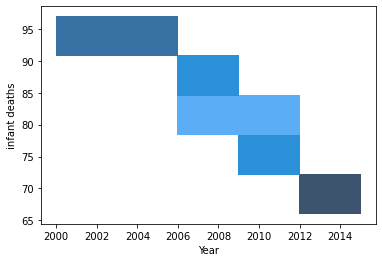

In [141]:
#Gerando o histograma bivariada por se tratar de duas variáveis'Year' e 'infant deaths' e
#além disso, temos a série temporal que é uma variável continua. Por esta razão usamos
#o histograma para representar série temporal.
mortalidade_Infantil=pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],'infant deaths':[97,97,96,95,94,92,90,87,84,81,78,75,72,69,67,66]})
sns.histplot(mortalidade_Infantil, x="Year", y="infant deaths", element="poly", fill=False)



In [142]:
#Obtendo dados estatísticos importantes para a análise, como por exemplo 
#a média neste caso é muito importante ser usado pela informação que nos dá e
#por não termos valores atípicos (outliers).
pais_Angola[['infant deaths']].describe()

,infant deaths
count,16.000000
mean,83.750000
std,11.310762
min,66.000000
25%,74.250000
50%,85.500000
75%,94.250000
max,97.000000


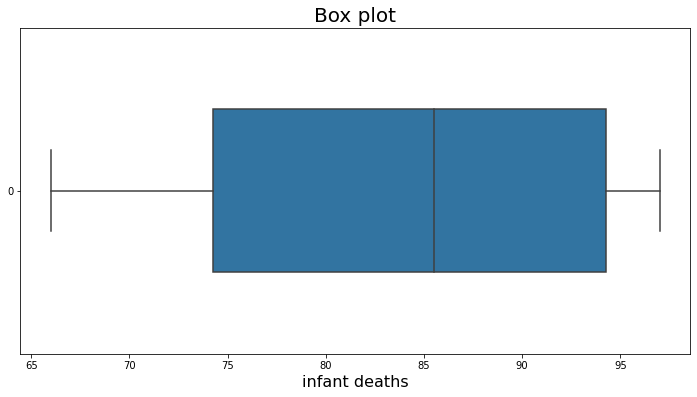

In [144]:
#Gerando box plot que é uma ferramenta importante para localização 
#visual da posição, simetria, dispersão, caudas e os valores atípicos (outliers)
#Neste caso não temos valores extremos (outliers)
mortalidade_Infantil = [97,97,96,95,94,92,90,87,84,81,78,75,72,69,67,66] 
ax = sns.boxplot(data = mortalidade_Infantil, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('infant deaths', fontsize=16)
ax


In [145]:
#Verificando o valor da Mediana que é o segundo Quartil
mortalidade_Infantil=pd.DataFrame({'infant deaths':[97,97,96,95,94,92,90,87,84,81,78,75,72,69,67,66]})
mortalidade_Infantil.median()


infant deaths    85.5
dtype: float64

In [146]:
mortalidade_Infantil=pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],'infant deaths':[97,97,96,95,94,92,90,87,84,81,78,75,72,69,67,66]})

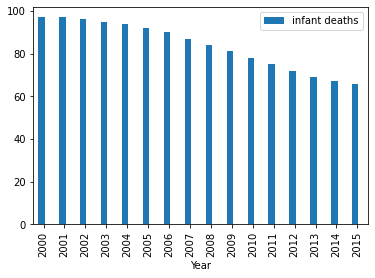

In [150]:
#Visualização gráfica de comportamento da mortalidade infantil durante o período de 2000 a 2015,
#e conluímos que o houve uma pequena queda de mortes até 2015 
mortalidade_Infantil.plot(kind = 'bar', x='Year', y='infant deaths', Width=0.3)
plt.show()

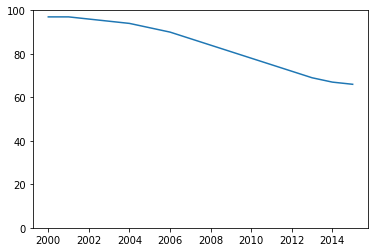

In [151]:
#Criando gráfico de linhas para Year e infant deaths
Year=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
infant_deaths=[97,97,96,95,94,92,90,87,84,81,78,75,72,69,67,66]
plt.plot(Year, infant_deaths)
plt.ylim(0,100)
plt.show()



In [153]:
#Visualização de composição de Renda da população e a sua evolução durante 
#o período de 2000 a 2015(Income composition of resources)
pais_Angola[['Year', 'Income composition of resources']]


,Year,Income composition of resources
Country,,
Angola,2015,0.531
Angola,2014,0.527
Angola,2013,0.523
Angola,2012,0.508
Angola,2011,0.495
Angola,2010,0.488
Angola,2009,0.480
Angola,2008,0.468
Angola,2007,0.454


In [154]:
#Criando DataFrame Year e income composition of resources
composicaoRenda = pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015], 
                                'Income composition of resources': [0.382,0.391, 0.401, 0.406, 0.415, 0.426, 0.439, 0.454, 0.468, 0.48, 0.488, 0.495, 0.508, 0.523, 0.527, 0.531]})


In [155]:
composicaoRenda

,Year,Income composition of resources
0,2000,0.382
1,2001,0.391
2,2002,0.401
3,2003,0.406
4,2004,0.415
5,2005,0.426
6,2006,0.439
7,2007,0.454
8,2008,0.468
9,2009,0.480


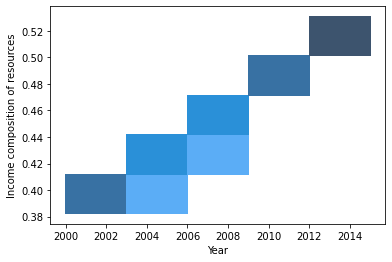

In [157]:
#Histograma para 'Income composition of resources' (composição de renda de recursos)
composicaoRenda = pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015], 
                                'Income composition of resources': [0.382,0.391, 0.401, 0.406, 0.415, 0.426, 0.439, 0.454, 0.468, 0.48, 0.488, 0.495, 0.508, 0.523, 0.527, 0.531]})
sns.histplot(composicaoRenda, x="Year", y="Income composition of resources", element="poly", fill=False)

In [158]:
#Propriedades estatísticas da composição de renda das pessoas
#Nesta situação obter a média é importante por não existir outlier
pais_Angola[['Income composition of resources']].describe()

,Income composition of resources
count,16.000000
mean,0.458375
std,0.051078
min,0.382000
25%,0.412750
50%,0.461000
75%,0.498250
max,0.531000


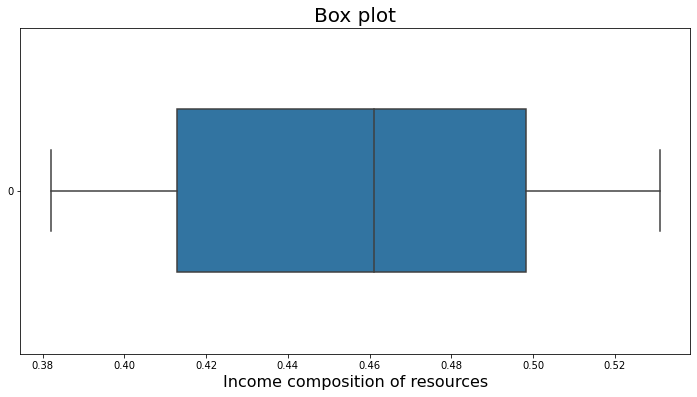

In [160]:
#Gerando o gráfico de caixa Box plot para composição de renda
#neste gráfico, temos as seguintes informações: valor mínimo,
# primeiro quartil, segundo quartil, terceiro quartil e valor máximo 
renda = [0.382,0.391, 0.401, 0.406, 0.415, 0.426, 0.439, 0.454, 0.468, 0.48, 0.488, 0.495, 0.508, 0.523, 0.527, 0.531] 
ax = sns.boxplot(data = renda, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Income composition of resources', fontsize=16)
ax



ANÁLISE COM REGRESSÃO LINEAR SIMPLES E CORRELAÇÃO 

In [161]:
#Fazendo análise entre variáveis y = 'infant deaths' e x = 'Income composition of resources'
#Usando o conceito de correlação entre as duas variáveis
dadosRegressaoLinear = {'x':[0.531, 0.527, 0.523, 0.508, 0.495, 0.488, 0.480, 0.468, 0.454, 0.439, 0.426, 0.415, 0.406, 0.401, 0.391, 0.382],
                          'y':[66, 67, 69, 72, 75, 78, 81, 84, 87, 90, 92, 94, 95, 96, 97, 97]}

In [162]:
dadosRegressaoLinear

{'x': [0.531,
  0.527,
  0.523,
  0.508,
  0.495,
  0.488,
  0.48,
  0.468,
  0.454,
  0.439,
  0.426,
  0.415,
  0.406,
  0.401,
  0.391,
  0.382],
 'y': [66, 67, 69, 72, 75, 78, 81, 84, 87, 90, 92, 94, 95, 96, 97, 97]}

In [163]:
dadosRegressaoLinear = pd.DataFrame(dadosRegressaoLinear)

In [164]:
#Visualizando as cinco primeiras posição de dados
dadosRegressaoLinear.head()

,x,y
0,0.531,66
1,0.527,67
2,0.523,69
3,0.508,72
4,0.495,75


In [165]:
dadosRegressaoLinear.shape

(16, 2)

In [166]:
#Propriedades estatísticas destas duas colunas (x e y)
dadosRegressaoLinear.describe()

,x,y
count,16.000000,16.000000
mean,0.458375,83.750000
std,0.051078,11.310762
min,0.382000,66.000000
25%,0.412750,74.250000
50%,0.461000,85.500000
75%,0.498250,94.250000
max,0.531000,97.000000


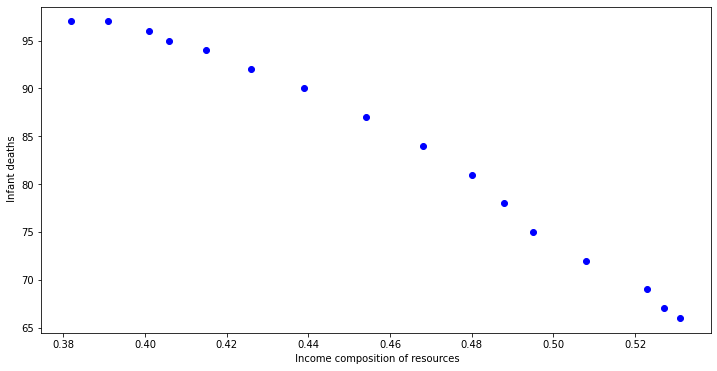

In [167]:
#Gerando o gráfico de Dispersão para 'Income composition of Resources' e 
#'infant deaths
plt.figure(figsize = (12,6))
plt.scatter(
    pais_Angola['Income composition of resources'], 
    pais_Angola['infant deaths'], 
    c='blue')
plt.xlabel(" Income composition of resources")
plt.ylabel(" Infant deaths")
plt.show()


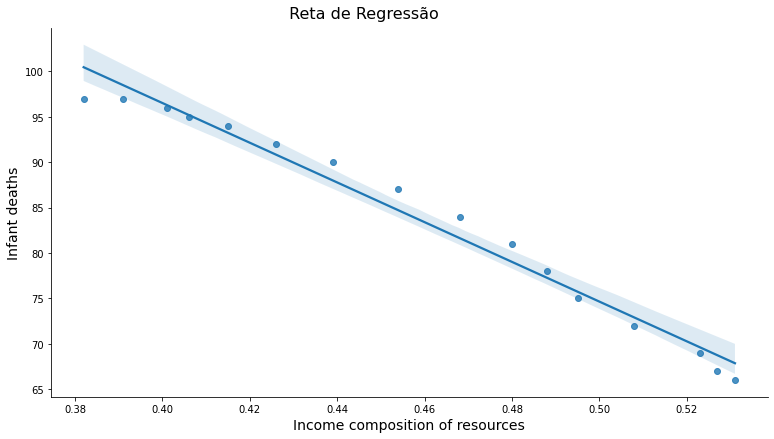

In [168]:
#Obtendo a reta da regressão
#que mostra a forte correlação entre essas duas variáveis
#Ou seja, a medida que a composição de renda de recursos aumenta, diminui a mortalidade
#infantil.
ax = sns.lmplot(x = "x", y = "y", data = dadosRegressaoLinear)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle(' Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("Income composition of resources", fontsize=14)
ax.set_ylabels("Infant deaths", fontsize=14)
ax

In [169]:
#Resultado: coeficiente de correlação linear negativa muito forte
#De acordo com a tabela de valores críticos do coeficiente de correlação
#de Pearson r, com 16 pares: 0.497 (para α=0.05) e 0.623 (para α=0.01)
#como temos r=0.988 > 0.497 e valor absoluto de r.
#r^2=0.976(proporção da variação em 'y') ou seja, concluimos que 0.976 (ou cerca 98%) da variação da mortalidade
# infantil, pode ser explicada pela relação linear com composição de renda
  
dadosRegressaoLinear.corr()

,x,y
x,1.000000,-0.988531
y,-0.988531,1.000000


In [170]:
#Analizando a expectativa de vida em Angola de 2000 a 2015
expectativaVida=pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],
                              'Life expectancy':[45.3, 45.7, 46.3, 46.8, 47.1, 47.4, 47.7, 48.2, 48.7, 49.1, 49.6, 51.0, 56.0, 51.1, 51.7, 52.4]})

In [171]:
expectativaVida

,Year,Life expectancy
0,2000,45.3
1,2001,45.7
2,2002,46.3
3,2003,46.8
4,2004,47.1
5,2005,47.4
6,2006,47.7
7,2007,48.2
8,2008,48.7
9,2009,49.1


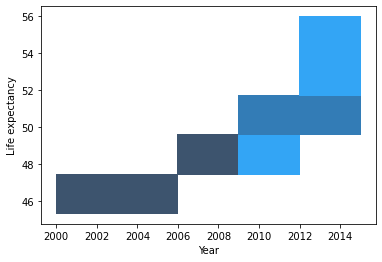

In [172]:
#Histograma para exepectativa de vida em cada ano
#mostrando a evolução na melhora da expectativa de vida em Angola
sns.histplot(expectativaVida, x="Year", y="Life expectancy", element="poly", fill=False)

In [173]:
#Propriedades estatísticas para Life expectancy
expectativaVida = pd.DataFrame({'Life expectancy':[45.3, 45.7, 46.3, 46.8, 47.1, 47.4, 47.7, 48.2, 48.7, 49.1, 49.6, 51.0, 56.0, 51.1, 51.7, 52.4]})
expectativaVida.describe()

,Life expectancy
count,16.000000
mean,49.006250
std,2.851074
min,45.300000
25%,47.025000
50%,48.450000
75%,51.025000
max,56.000000


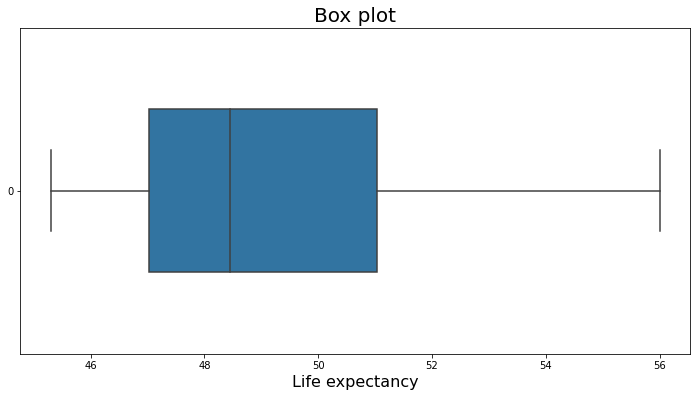

In [174]:
#Gerando o gráfico de caixa ou Box Plot para Life expectancy
expectativaVida=[45.3, 45.7, 46.3, 46.8, 47.1, 47.4, 47.7, 48.2, 48.7, 49.1, 49.6, 51.0, 56.0, 51.1, 51.7, 52.4]
ax = sns.boxplot(data = expectativaVida, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Life expectancy', fontsize=16)
ax

In [185]:
#Analizando o nível de escolaridade em Angola
escolaridade=pd.DataFrame({'Year':[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015],
                           'Schooling':[4.6,5.1,5.5,5.9,6.4,6.8,7.2,7.7,8.1,8.5,9.0,9.4,10.3,11.4,11.4,11.4]})


In [186]:
escolaridade

,Year,Schooling
0,2000,4.6
1,2001,5.1
2,2002,5.5
3,2003,5.9
4,2004,6.4
5,2005,6.8
6,2006,7.2
7,2007,7.7
8,2008,8.1
9,2009,8.5


In [187]:
#Histograma  mostrando a evolução da escolaridade em Angola entre 2000 a 2015

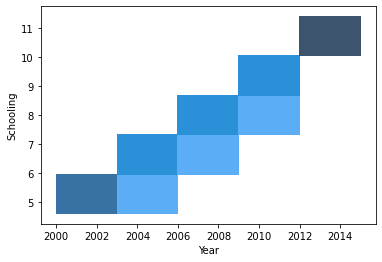

In [188]:
sns.histplot(escolaridade, x="Year", y="Schooling", element="poly", fill=False)

In [189]:
escolaridade=pd.DataFrame({'Schooling':[4.6, 5.1, 5.5, 5.9, 6.4, 6.8, 7.2, 7.7, 8.1, 8.5, 9.0, 9.4, 10.3, 11.4, 11.4, 11.4]})

In [190]:
escolaridade

,Schooling
0,4.6
1,5.1
2,5.5
3,5.9
4,6.4
5,6.8
6,7.2
7,7.7
8,8.1
9,8.5


In [191]:
#Propriedades Estatísticas da Escolaridade
#Média de 8 anos de escolaridade mostra a baixa taxa de estudo de acordo a ONU
escolaridade.describe()


,Schooling
count,16.00000
mean,8.04375
std,2.28793
min,4.60000
25%,6.27500
50%,7.90000
75%,9.62500
max,11.40000


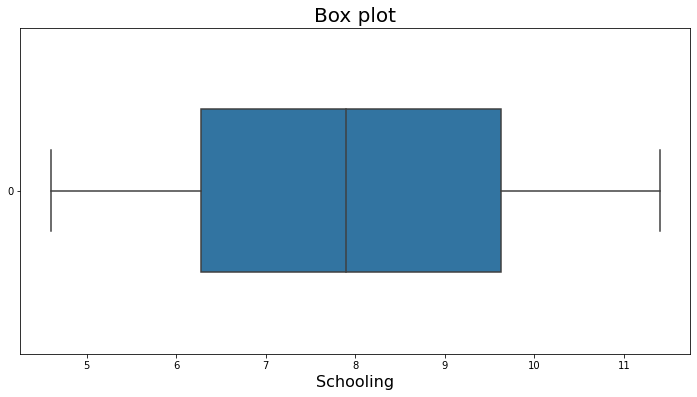

In [192]:
#Gráfico Box Plot para Escolaridade
#Notamos a não presença de outliers
escolaridade=[4.6, 5.1, 5.5, 5.9, 6.4, 6.8, 7.2, 7.7, 8.1, 8.5, 9.0, 9.4, 10.3, 11.4, 11.4, 11.4]
ax = sns.boxplot(data = escolaridade, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Schooling', fontsize=16)
ax

 ANÁLISE COM REGRESSÃO LINERAR SIMPLES E CORRELAÇÃO

In [193]:
#Análse entre expectativa de vida e escolaridade, usando o conceito da correlação e
#plotando a reta de regressão
#x=Life_expectancy    y=Schooling
expectativaVidaEscola={'y':[45.3, 45.7, 46.3, 46.8, 47.1, 47.4, 47.7, 48.2, 48.7, 49.1, 49.6, 51.0, 56.0, 51.1, 51.7, 52.4],
                       'x':[4.6, 5.1, 5.5, 5.9, 6.4, 6.8, 7.2, 7.7, 8.1, 8.5, 9.0, 9.4, 10.3, 11.4, 11.4, 11.4]}


In [194]:
expectativaVidaEscola

{'x': [4.6,
  5.1,
  5.5,
  5.9,
  6.4,
  6.8,
  7.2,
  7.7,
  8.1,
  8.5,
  9.0,
  9.4,
  10.3,
  11.4,
  11.4,
  11.4],
 'y': [45.3,
  45.7,
  46.3,
  46.8,
  47.1,
  47.4,
  47.7,
  48.2,
  48.7,
  49.1,
  49.6,
  51.0,
  56.0,
  51.1,
  51.7,
  52.4]}

In [195]:
expectativaVidaEscola = pd.DataFrame(expectativaVidaEscola)

In [196]:
expectativaVidaEscola.head()

,y,x
0,45.3,4.6
1,45.7,5.1
2,46.3,5.5
3,46.8,5.9
4,47.1,6.4


In [197]:
expectativaVidaEscola.shape

(16, 2)

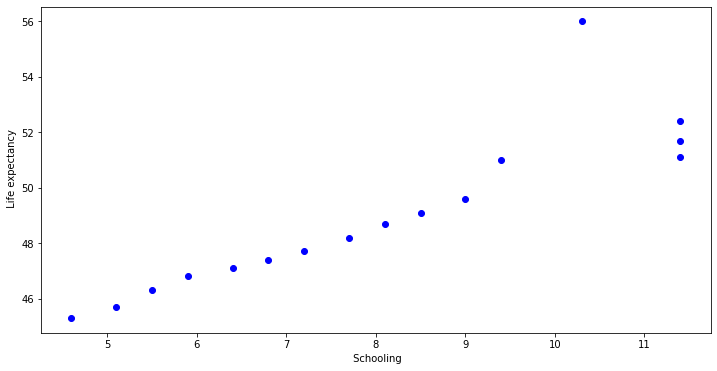

In [198]:
#Gerando o gráfico de Dispersão entre Schooling e Life expectancy
plt.figure(figsize = (12,6))
plt.scatter( expectativaVidaEscola['x'], expectativaVidaEscola['y'], c='blue')
plt.xlabel(" Schooling")
plt.ylabel(" Life expectancy")
plt.show()


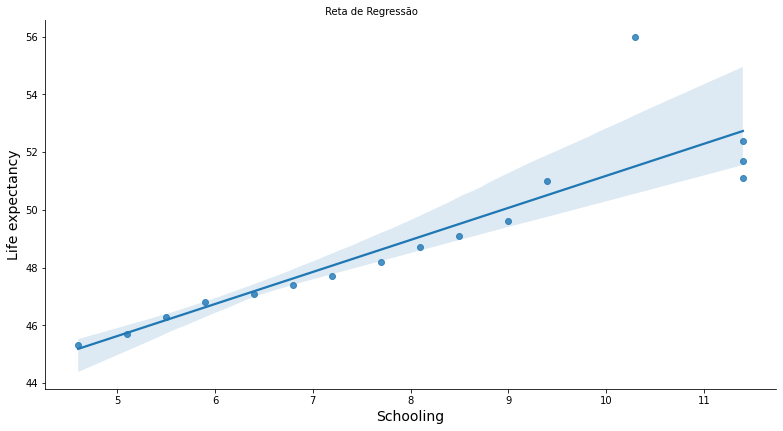

In [200]:
#Traçando a Reta de Regressão
ax = sns.lmplot(x = "x", y = "y", data = expectativaVidaEscola)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle(' Reta de Regressão', fontsize=10, y=1.00)
ax.set_xlabels("Schooling", fontsize=14)
ax.set_ylabels("Life expectancy", fontsize=14)
ax

In [201]:
#Determinando o coeficiente de correlação de Pearson (r) entre 'Schooling' e 'Life expectancy'
#Resultando em coeficiente de correlação positiva forte (análise com tabela de valores críticos)
#ou seja, as duas variáveis estão correlacionadas. Quando a taxa de escolaridade
#cresce, aumenta a expectativa de vida.
expectativaVidaEscola.corr()

,y,x
y,1.000000,0.890744
x,0.890744,1.000000


In [202]:
#Analisando GDP (pib)
pibAno=pd.DataFrame({'Year':[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'GDP':[555.296942, 525.168743, 711.181716, 779.468356, 141.868440, 1443.991929, 262.415149, 2878.837144, 3868.578883, 3347.844850, 3529.534820, 4299.128890, 4598.249988, 484.616884, 479.312240, 3695.793748]})
                                  


In [203]:
pibAno

,Year,GDP
0,2000,555.296942
1,2001,525.168743
2,2002,711.181716
3,2003,779.468356
4,2004,141.868440
5,2005,1443.991929
6,2006,262.415149
7,2007,2878.837144
8,2008,3868.578883
9,2009,3347.844850


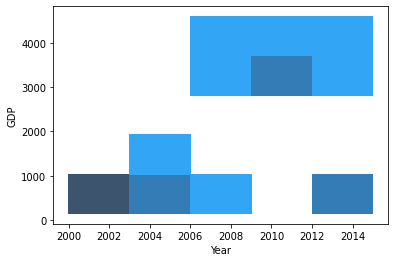

In [204]:
#Gerando o histograma para GDP vs Year
sns.histplot(pibAno, x="Year", y="GDP", element="poly", fill=False)

In [205]:
#Propriedades estatísticas para GDP
#Os dados desta coluna 'GDP' apresenta valores átipicos (outliers)
pib=pd.DataFrame({'GDP':[555.296942, 525.168743, 711.181716, 779.468356, 141.868440, 1443.991929, 262.415149, 2878.837144, 3868.578883, 3347.844850, 3529.534820, 4299.128890, 4598.249988, 484.616884, 479.312240, 3695.793748]})

In [71]:
pib.describe()

,GDP
count,16.000000
mean,1975.080545
std,1675.822229
min,141.868440
25%,515.030778
50%,1111.730143
75%,3571.099552
max,4598.249988


In [206]:
#A média neste caso não se aplica devido a outliers (valores descrepantes presente nessa coluna)
#Vamos calcular a mediana que não é afetada pelos valores atípicos
pib.median()

GDP    1111.730143
dtype: float64

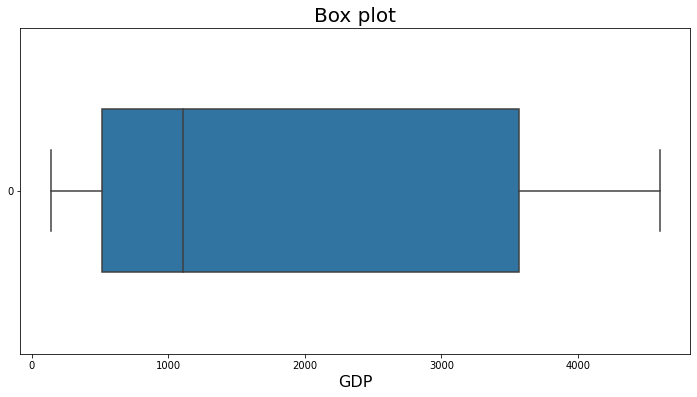

In [207]:
#Gráfico de caixa ou Box Plot para GDP (PIB) 
#Box Plot Assimétrico positivo
pib=[555.296942, 525.168743, 711.181716, 779.468356, 141.868440, 1443.991929, 262.415149, 2878.837144, 3868.578883, 3347.844850, 3529.534820, 4299.128890, 4598.249988, 484.616884, 479.312240, 3695.793748]
ax = sns.boxplot(data = pib, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('GDP', fontsize=16)
ax

ANÁLISE COM REGRESSÃO LINEAR SIMPLES E CORRELAÇÃO

In [208]:
#Analisando as variáveis GDP e Life expectancy usando a regressão linear simples
#x = Life expectancy
#y = GDP
pibExpectativaVida = {'y':[45.3, 45.7, 46.3, 46.8, 47.1, 47.4, 47.7, 48.2, 48.7, 49.1, 49.6, 51.0, 56.0, 51.1, 51.7, 52.4],
                                   'x':[555.296942, 525.168743, 711.181716, 779.468356, 141.868440, 1443.991929, 262.415149, 2878.837144, 3868.578883, 3347.844850, 3529.534820, 4299.128890, 4598.249988, 484.616884, 479.312240, 3695.793748]}


In [209]:
pibExpectativaVida

{'x': [555.296942,
  525.168743,
  711.181716,
  779.468356,
  141.86844,
  1443.991929,
  262.415149,
  2878.837144,
  3868.578883,
  3347.84485,
  3529.53482,
  4299.12889,
  4598.249988,
  484.616884,
  479.31224,
  3695.793748],
 'y': [45.3,
  45.7,
  46.3,
  46.8,
  47.1,
  47.4,
  47.7,
  48.2,
  48.7,
  49.1,
  49.6,
  51.0,
  56.0,
  51.1,
  51.7,
  52.4]}

In [210]:
pibExpectativaVida=pd.DataFrame(pibExpectativaVida)

In [211]:
pibExpectativaVida.head()

,y,x
0,45.3,555.296942
1,45.7,525.168743
2,46.3,711.181716
3,46.8,779.468356
4,47.1,141.868440


In [212]:
#Exibindo as 16 linhas e dua colunas

In [213]:
pibExpectativaVida.shape

(16, 2)

In [214]:
#Propriedades estatísticas das duas variáveis

In [215]:
pibExpectativaVida.describe()

,y,x
count,16.000000,16.000000
mean,49.006250,1975.080545
std,2.851074,1675.822229
min,45.300000,141.868440
25%,47.025000,515.030778
50%,48.450000,1111.730143
75%,51.025000,3571.099552
max,56.000000,4598.249988


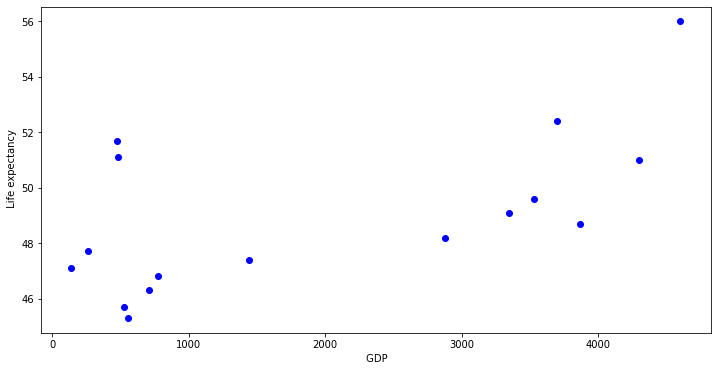

In [216]:
#Gerando o Gráfico de Dispersão das duas variáveis
#Nota-se a presença de vários valores atípicos (outliers)
#e também pontos muito dispersos como mostra o diagrama Box Plot acima
plt.figure(figsize = (12,6))
plt.scatter( pibExpectativaVida['x'], pibExpectativaVida['y'], c='blue')
plt.xlabel(" GDP")
plt.ylabel(" Life expectancy")
plt.show()


In [217]:
#Traçando a reta de regressão linear

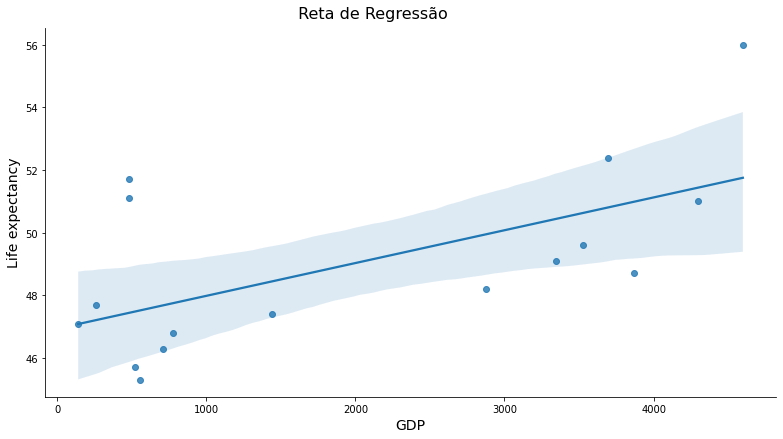

In [218]:
ax = sns.lmplot(x = "x", y = "y", data = pibExpectativaVida)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle(' Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("GDP", fontsize=14)
ax.set_ylabels("Life expectancy", fontsize=14)
ax

In [219]:
#Coeficiente de correlação entre 'GDP' e 'Life expectancy'
#Resultando em coeficiente de correlação r positiva moderada.
# Temos para 16 pares 0.497 (α=0.05). Ou seja, 0.615 > 0.497 de modo que conluimos
#que há uma correlação linear moderada entre o pib e a expectativa de vida.
pibExpectativaVida.corr() 

,y,x
y,1.000000,0.615489
x,0.615489,1.000000


In [220]:
#Analisando a Mortalidade de adultos (Adult Mortality) em Angola
mortalidadeAdultos=pd.DataFrame({'Year':[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Adult Mortality':[48.0, 44.0, 391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]})
                                  


In [221]:
mortalidadeAdultos

,Year,Adult Mortality
0,2000,48.0
1,2001,44.0
2,2002,391.0
3,2003,388.0
4,2004,386.0
5,2005,382.0
6,2006,381.0
7,2007,375.0
8,2008,371.0
9,2009,369.0


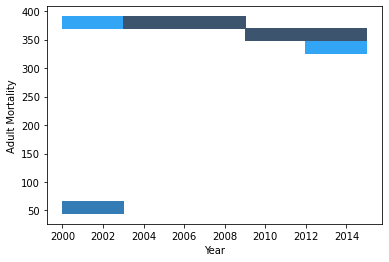

In [222]:
#Gerando histograma para mortalidade de adultos (Adult Mortality)
sns.histplot(mortalidadeAdultos, x="Year", y="Adult Mortality", element="poly", fill=False)

In [223]:
mortalidadeAdultos=pd.DataFrame({'Adult Mortality':[48.0, 44.0, 391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]})

In [224]:
mortalidadeAdultos

,Adult Mortality
0,48.0
1,44.0
2,391.0
3,388.0
4,386.0
5,382.0
6,381.0
7,375.0
8,371.0
9,369.0


In [225]:
#Propriedades estatísticas sopbre morte adulta (Adult Mortality)
#Presença de dados discrepantes na coluna
mortalidadeAdultos.describe() 

,Adult Mortality
count,16.000000
mean,328.562500
std,111.350479
min,44.000000
25%,353.250000
50%,367.000000
75%,381.250000
max,391.000000


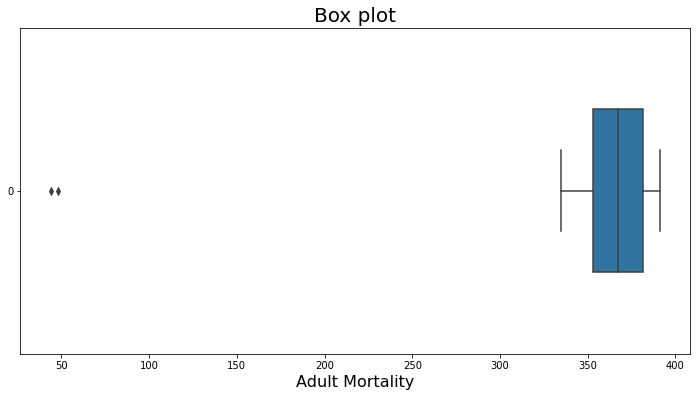

In [226]:
#Box Plot para 'Adult Mortality'
#Nota-se claramente a inluência de outliers conforme mostrado no box plot
mortalidadeAdultos=[48.0, 44.0, 391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]
ax = sns.boxplot(data = mortalidadeAdultos, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Adult Mortality', fontsize=16)
ax


In [227]:
#Achando a mediana
mortalidadeAdultos=pd.DataFrame({'Adult Mortality': [48.0, 44.0, 391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]})
mortalidadeAdultos.median()

Adult Mortality    367.0
dtype: float64

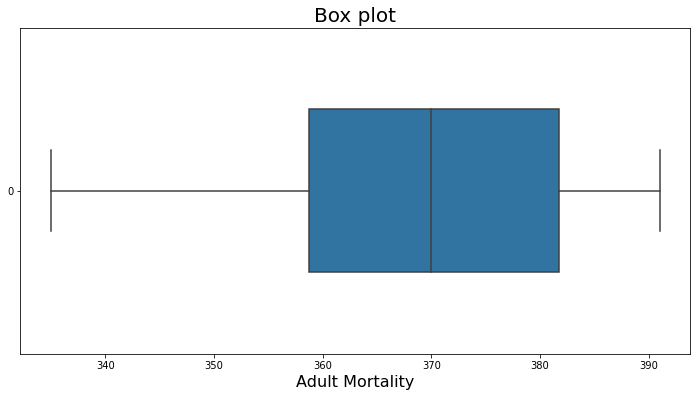

In [228]:
#'Adult Mortality' sem outliers(eliminando os valores: 48.0 e 44.0)
#Os outliers só devem ser excluidos na coluna quando detectamos erros nestes valores.
mortalidadeAdultos=[391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]
ax = sns.boxplot(data = mortalidadeAdultos, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Adult Mortality', fontsize=16)
ax

In [230]:
#Propriedades estatísticas para 'Adult Mortality' sem outliers
mortalidadeAdultos=pd.DataFrame({'Adult Mortality':[391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]})
mortalidadeAdultos.describe()

,Adult Mortality
count,14.000000
mean,368.928571
std,16.363488
min,335.000000
25%,358.750000
50%,370.000000
75%,381.750000
max,391.000000


In [231]:
#Análise da coluna 'HIV/AIDS'
hivAids=pd.DataFrame({'Year':[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'HIV/AIDS':[2.0, 2.1, 2.3, 2.4, 2.5, 2.6, 2.5, 2.6, 2.6, 2.5, 2.5, 2.5, 2.6, 2.3, 2.0, 1.9]})
                                  

In [232]:
hivAids

,Year,HIV/AIDS
0,2000,2.0
1,2001,2.1
2,2002,2.3
3,2003,2.4
4,2004,2.5
5,2005,2.6
6,2006,2.5
7,2007,2.6
8,2008,2.6
9,2009,2.5


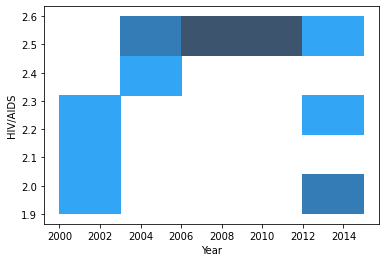

In [233]:
#Histograma
sns.histplot(hivAids, x="Year", y="HIV/AIDS", element="poly", fill=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


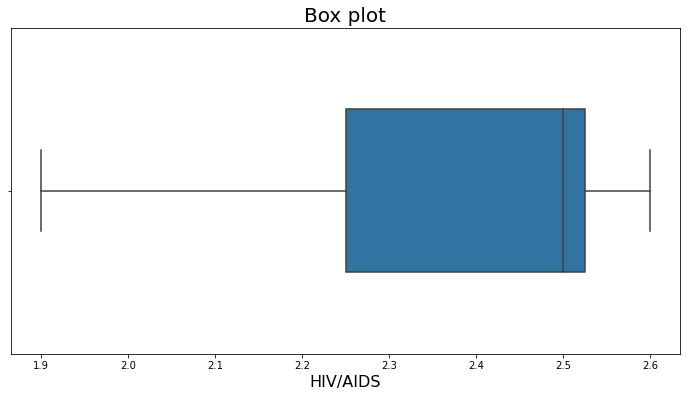

In [234]:
#Box Plot mostrando a assimetria nos dados HIV/AIDS
hivAids=[2.0, 2.1, 2.3, 2.4, 2.5, 2.6, 2.5, 2.6, 2.6, 2.5, 2.5, 2.5, 2.6, 2.3, 2.0, 1.9]
ax = sns.boxplot(hivAids, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('HIV/AIDS', fontsize=16)
ax

In [235]:
#Propriedades Estatísticas para 'HIV/AIDS
hivAids=pd.DataFrame({'HIV/AIDS':[2.0, 2.1, 2.3, 2.4, 2.5, 2.6, 2.5, 2.6, 2.6, 2.5, 2.5, 2.5, 2.6, 2.3, 2.0, 1.9]})

In [104]:
hivAids.describe()

,HIV/AIDS
count,16.000000
mean,2.368750
std,0.241437
min,1.900000
25%,2.250000
50%,2.500000
75%,2.525000
max,2.600000


In [236]:
#Análise sobre alcoolismo em Angola
alcoolismo=pd.DataFrame({'Year':[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
                                'Alcohol':[1.85, 2.58, 2.82, 3.49, 3.53, 5.04, 5.84, 6.35, 7.07, 7.01, 7.80, 8.06, 8.24, 8.10, 8.33]})

In [237]:
alcoolismo

,Year,Alcohol
0,2000,1.85
1,2001,2.58
2,2002,2.82
3,2003,3.49
4,2004,3.53
5,2005,5.04
6,2006,5.84
7,2007,6.35
8,2008,7.07
9,2009,7.01


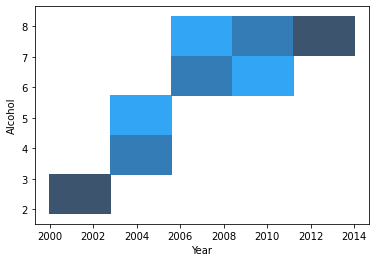

In [238]:
#Gerando histograma sobre o  alcoolismo em Angola
sns.histplot(alcoolismo, x="Year", y="Alcohol", element="poly", fill=False)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


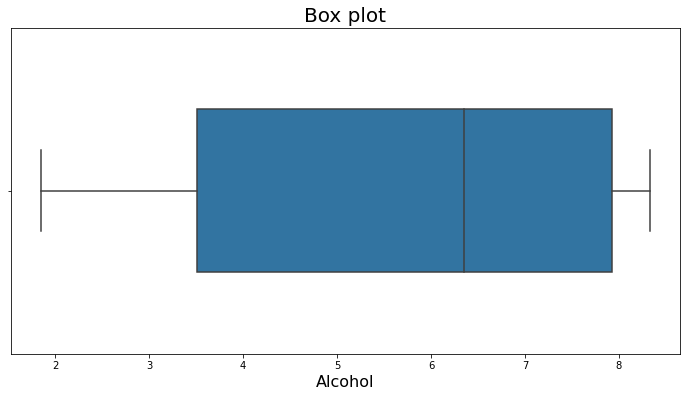

In [239]:
#Diagrama de caixa (Box Plot) sobre 'Alcohol'
alcoolismo=[1.85, 2.58, 2.82, 3.49, 3.53, 5.04, 5.84, 6.35, 7.07, 7.01, 7.80, 8.06, 8.24, 8.10, 8.33]
ax = sns.boxplot(alcoolismo, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Alcohol', fontsize=16)
ax

In [240]:
#Propiedades estatísticas sobre 'Alcohol'
alcoolismo=pd.DataFrame({'Alcohol':[1.85, 2.58, 2.82, 3.49, 3.53, 5.04, 5.84, 6.35, 7.07, 7.01, 7.80, 8.06, 8.24, 8.10, 8.33]})
alcoolismo.describe()



,Alcohol
count,15.000000
mean,5.740667
std,2.329903
min,1.850000
25%,3.510000
50%,6.350000
75%,7.930000
max,8.330000


In [241]:
#Analisando a relação entre 'HIV/AIDS' e 'Adult Mortality'
mortalidadeAdultoHIV = pd.DataFrame({'x':[2.0, 2.1, 2.3, 2.4, 2.5, 2.6, 2.5, 2.6, 2.6, 2.5, 2.5, 2.5, 2.6, 2.3, 2.0, 1.9],
                                   'y':[48.0, 44.0, 391.0, 388.0, 386.0, 382.0, 381.0, 375.0, 371.0, 369.0, 365.0, 361.0, 358.0, 355.0, 348.0, 335.0]})

In [242]:
mortalidadeAdultoHIV

,x,y
0,2.0,48.0
1,2.1,44.0
2,2.3,391.0
3,2.4,388.0
4,2.5,386.0
5,2.6,382.0
6,2.5,381.0
7,2.6,375.0
8,2.6,371.0
9,2.5,369.0


ANÁLISE COM REGRESSÃO LINEAR SIMPLES E CORRELAÇÃO

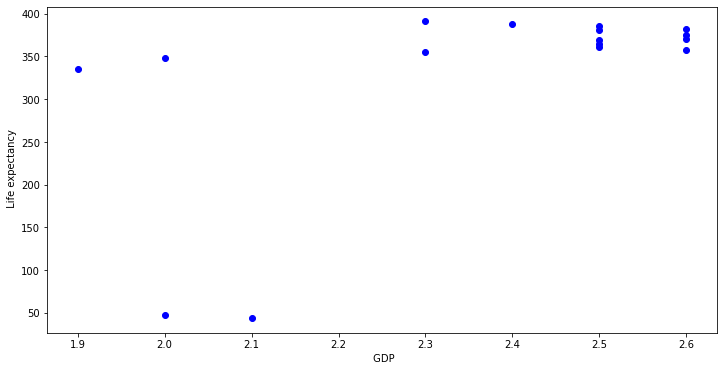

In [243]:
#Plotando o gráfico de dispersão
plt.figure(figsize = (12,6))
plt.scatter( mortalidadeAdultoHIV['x'], mortalidadeAdultoHIV['y'], c='blue')
plt.xlabel(" GDP")
plt.ylabel(" Life expectancy")
plt.show()


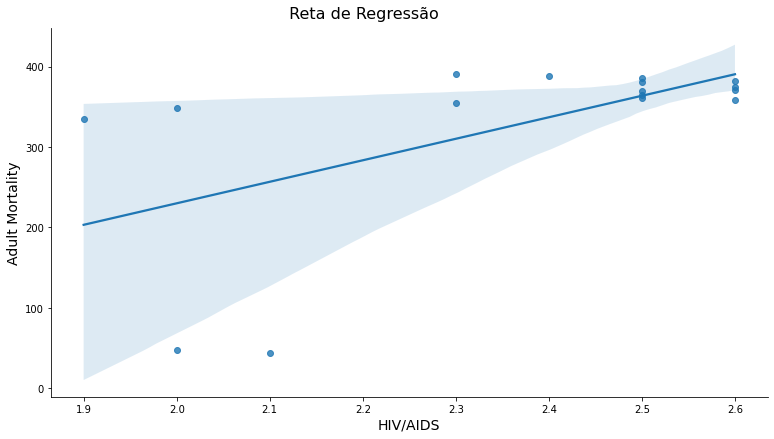

In [244]:
ax = sns.lmplot(x = "x", y = "y", data = mortalidadeAdultoHIV)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle(' Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("HIV/AIDS", fontsize=14)
ax.set_ylabels("Adult Mortality", fontsize=14)
ax

In [245]:
#Determinando o coeficiente de correlação entre 'AIV/AIDS' e 'Adult Mortality'
#Resultado é coeficiente  de correlação positivo moderado
#A tabela de valores críticos de coeficiente de correlação de Pearson r nos leva 
# a concluir: para 16 pares 0.497 (para α=0.05), 0.580 > 0.497.Ou seja, r excede ligeramente
#do valor 0.497.Existe uma relação linear entre as duas variáveis de forma moderada.
mortalidadeAdultoHIV.corr()

,x,y
x,1.000000,0.580222
y,0.580222,1.000000
